# 比较、掩码和布尔逻辑

这一节将会介绍如何用布尔掩码来查看和操作 `NumPy` 数组中的值。  
当你想基于某些准则来抽取、修改、计数或对一个数组中的值进行其他操作时，掩码就可以派上用场了。  
例如你可能希望统计数组中有多少值大于某一个给定值，或者删除所有超出某些门限值的异常点。  
在 `NumPy` 中，布尔掩码通常是完成这类任务的最高效方式。

In [1]:
import numpy as np

np.random.seed(0)

In [2]:
%%html
<style>
  table {margin-left: 0 !important;}
  img {width:30%; height: 30%;}
</style>

## 1. 示例：统计下雨天数

In [3]:
import pandas as pd

rainfall = pd.read_csv('../data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254  # 1/10mm -> inches
inches.shape

(365,)

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <BarContainer object of 40 artists>)

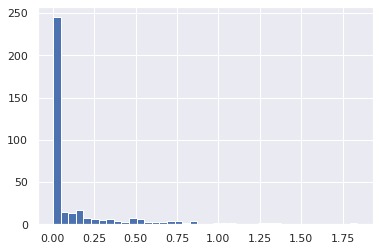

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.hist(inches, 40)